## Code for Simulated Reciprocating Antenna

In [4]:
pip install matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


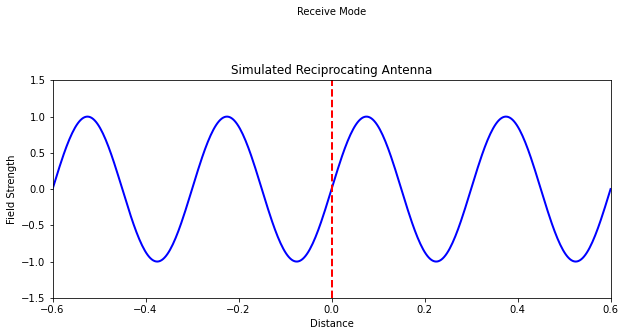

In [1]:
# Jupyter Animation of Reciprocating Antenna

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Constants
c = 3e8
f = 1e9
wavelength = c / f
k = 2 * np.pi / wavelength
omega = 2 * np.pi * f
amplitude = 1

# Grid
x = np.linspace(-2*wavelength, 2*wavelength, 400)
t = np.linspace(0, 2e-9, 100)

# Figure setup
fig, ax = plt.subplots(figsize=(10, 4))
line, = ax.plot([], [], lw=2, color='blue')
antenna_line, = ax.plot([0, 0], [-1.5, 1.5], color='red', linestyle='--', linewidth=2)
ax.set_xlim(-2*wavelength, 2*wavelength)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Simulated Reciprocating Antenna")
ax.set_xlabel("Distance")
ax.set_ylabel("Field Strength")
text = ax.text(0.5, 1.3, '', transform=ax.transAxes, ha='center')

# Init function
def init():
    line.set_data([], [])
    text.set_text('')
    return line, antenna_line, text

# Update function
def animate(i):
    mode = (i // 50) % 2
    if mode == 0:
        y = amplitude * np.sin(k * x - omega * t[i])
        text.set_text("Transmit Mode")
    else:
        y = amplitude * np.sin(k * x + omega * t[i])
        text.set_text("Receive Mode")
    line.set_data(x, y)
    return line, antenna_line, text

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=len(t),
                              init_func=init, blit=True, interval=50)

# Display in notebook
HTML(ani.to_jshtml())


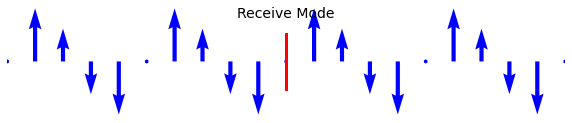

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Constants
c = 3e8
f = 1e9
wavelength = c / f
k = 2 * np.pi / wavelength
omega = 2 * np.pi * f

# Grid points for vector field (1D layout)
x = np.linspace(-2*wavelength, 2*wavelength, 21)
y = np.zeros_like(x)  # All vectors lie on x-axis

# Time steps
t = np.linspace(0, 2e-9, 100)

# Figure and axis setup
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlim(-2*wavelength, 2*wavelength)
ax.set_ylim(-1, 1)
ax.set_aspect('auto')
ax.axis('off')

# Plot antenna (red dipole)
antenna = ax.plot([0, 0], [-0.5, 0.5], color='red', linewidth=3)[0]

# Initial quiver (vector field)
U = np.zeros_like(x)  # horizontal component
V = np.zeros_like(x)  # vertical component (aligned with y-axis)
quiver = ax.quiver(x, y, U, V, color='blue', scale=10)

text = ax.text(0, 0.8, '', ha='center', fontsize=14)

# Update function
def animate(i):
    mode = (i // 50) % 2
    phi = omega * t[i]

    # Transmit mode: outward vectors
    if mode == 0:
        V = np.sin(k * x - phi)
        text.set_text('Transmit Mode')
    else:  # Receive mode: inward vectors
        V = np.sin(k * x + phi)
        text.set_text('Receive Mode')

    quiver.set_UVC(np.zeros_like(x), V)
    return quiver, antenna, text

# Animation
ani = animation.FuncAnimation(fig, animate, frames=len(t),
                              interval=50, blit=True)

# Display animation in Jupyter
HTML(ani.to_jshtml())
